# Bike Sharing Assignment


## Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# As we can see in the info table, there is no null value in the dataset.

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data preparation

#### Mapping

In [7]:
bike['weekday'] = bike.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bike['weekday'].value_counts()

monday       105
tuesday      105
wednesday    104
thursday     104
friday       104
saturday     104
sunday       104
Name: weekday, dtype: int64

In [8]:
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bike['mnth'].value_counts()

Jan      62
March    62
May      62
Jul      62
Aug      62
Oct      62
Dec      62
Apr      60
Jun      60
Sept     60
Nov      60
Feb      56
Name: mnth, dtype: int64

In [10]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [11]:
# We see that there are no values corresponding to heavy rain in 'weathersit' column. I will map each number with a shorter version

In [12]:
bike['weathersit'] = bike.weathersit.map({1: 'clear', 2: 'mist', 3: 'lightsnow', 4: 'heavy'})
bike['weathersit'].value_counts()

clear        463
mist         246
lightsnow     21
Name: weathersit, dtype: int64

In [13]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualizing the data

### Visualize the numerical variables

In [14]:
numlist =  bike[['temp','atemp','hum','windspeed','casual','registered','cnt']]

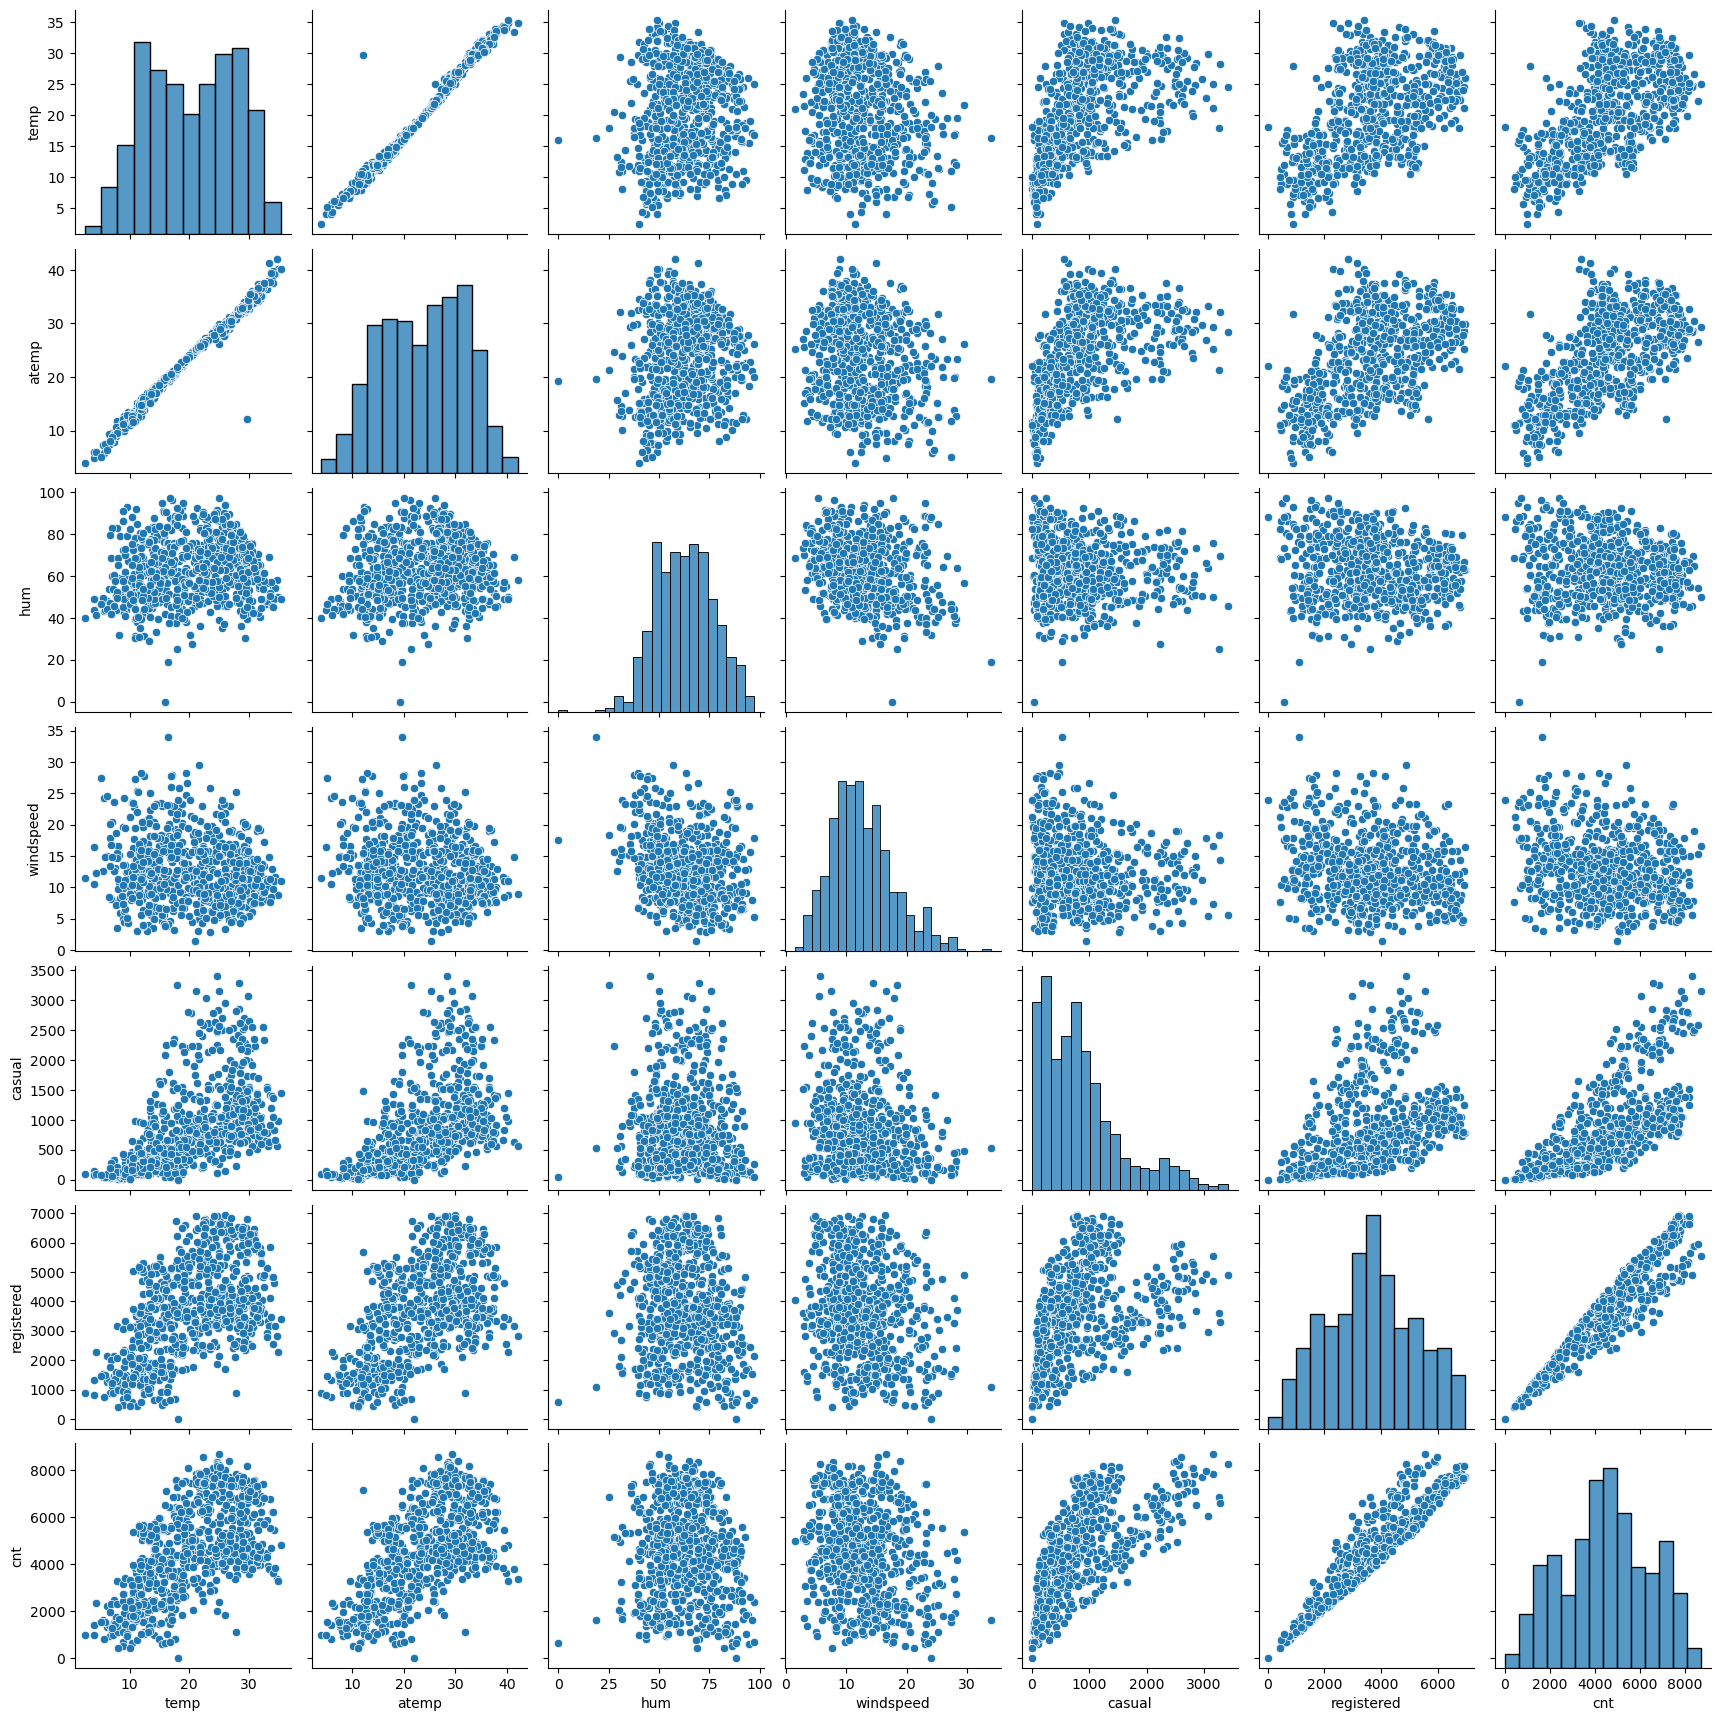

In [15]:
sns.pairplot(numlist)
plt.show()

- As you can see in the pairplot above, 'cnt' are highly correlated with 'registed' and 'casual' since 'cnt' is counted of total rental bikes including both casual and registered. I will drop the 'casual' and 'registered' columns because they will not help to predict the 'cnt' variable.
- 'temp' and 'atemp'  are highly correlated so I will chose 'temp' and drop 'atemp' for further analysis. 

In [16]:
bike = bike.drop(columns=['casual', 'registered','atemp'])

### Visualising Categorical Variables

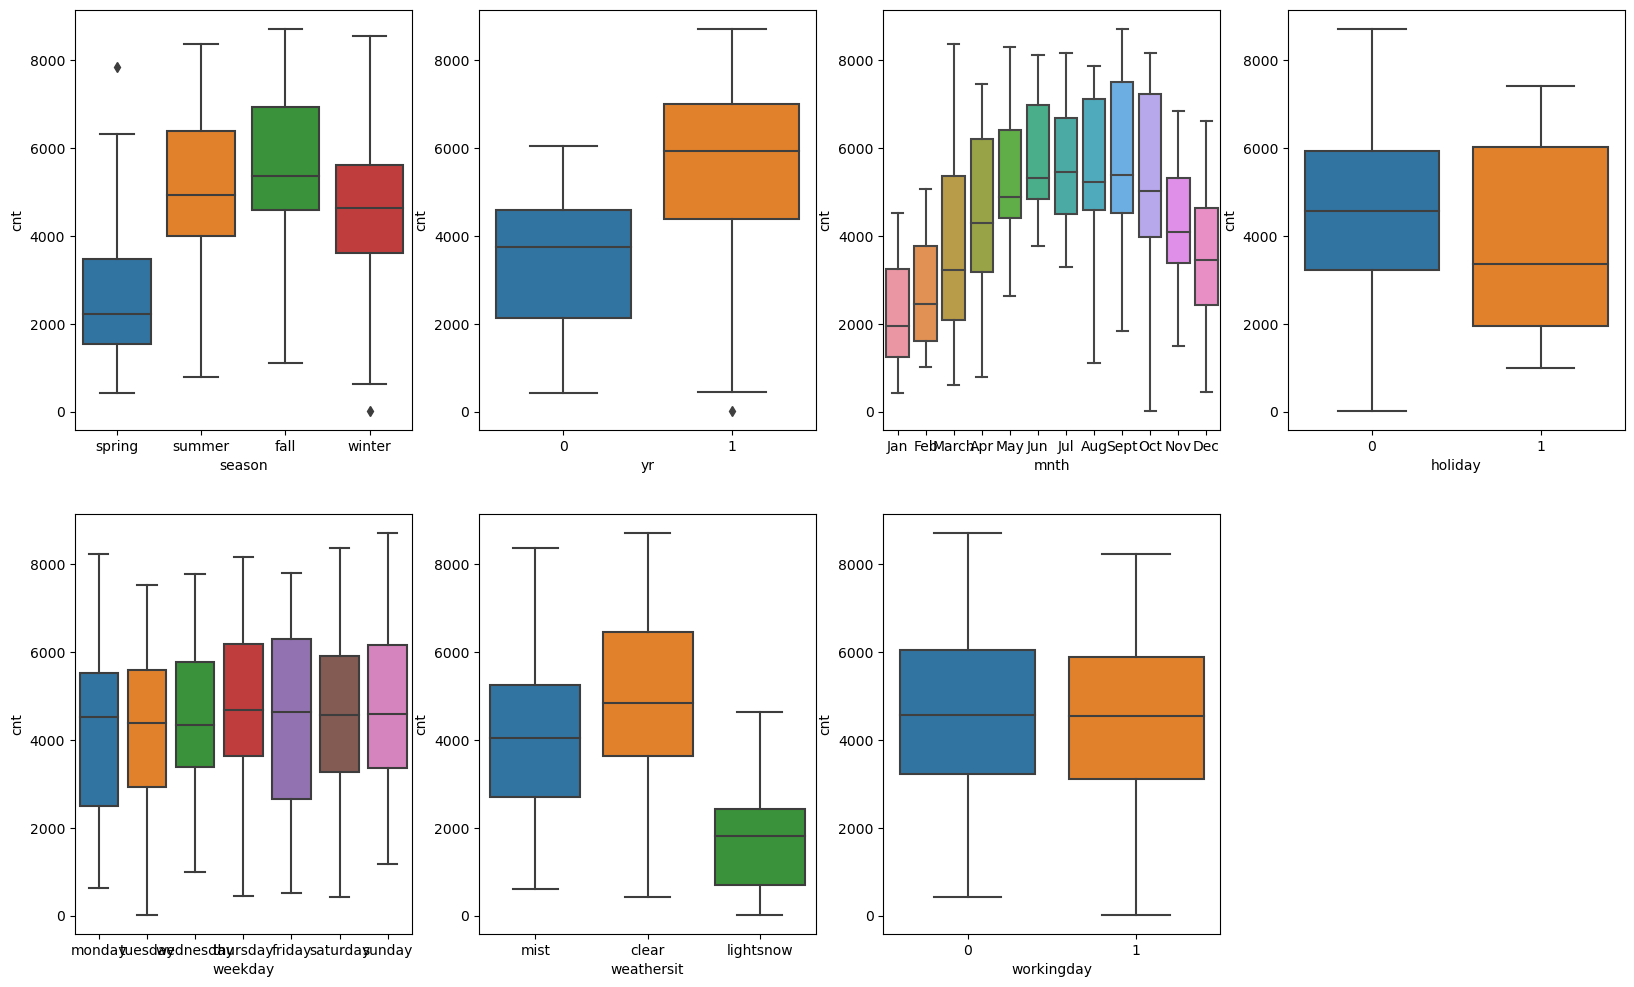

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.show()

- Fall season has the highest mean of rental bikes
- People rent bike in Year 2019 more than in Year 2018
- Peak season of the year is in Summer (June, July, August, September)
- People rent more bikes on clear days.

### Dummy Variables


In [18]:
dummy_var_col = ['mnth', 'season', 'weekday', 'weathersit']

In [19]:
status = pd.get_dummies(bike[dummy_var_col], drop_first=True)
status.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_March,mnth_May,mnth_Nov,mnth_Oct,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightsnow,weathersit_mist
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike = pd.concat([bike, status], axis = 1)

In [21]:
bike = bike.drop(columns=dummy_var_col)

In [22]:
bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightsnow,weathersit_mist
0,1,01-01-2018,0,0,1,14.110847,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,1,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,1
2,3,03-01-2018,0,0,1,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
bike.drop(['instant'], axis = 1, inplace = True)

In [24]:
bike.drop(['dteday'], axis = 1, inplace = True)

In [25]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightsnow,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state=100)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
num_vars = ['temp','hum','windspeed','cnt']

In [31]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightsnow,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,1,0,0,0,0,1


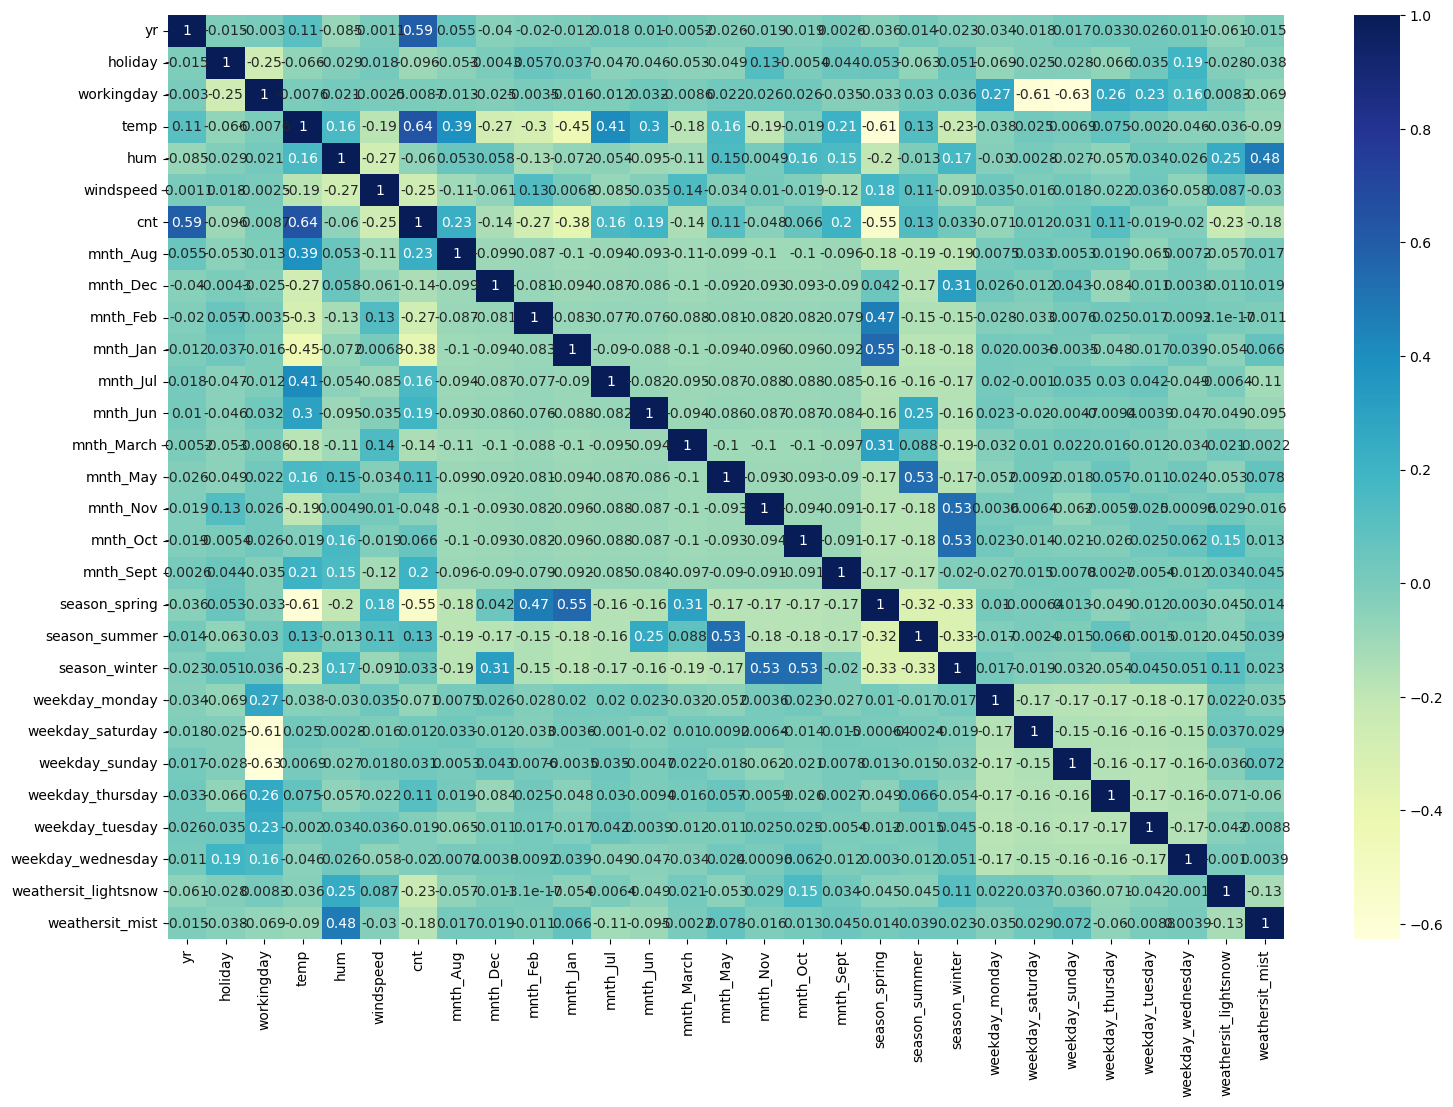

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (18, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As you can see on the heatmap above, year and temperature are the top 2 most correlated with cnt. 

### Dividing into X and Y sets for the model building

##### Fixing Trained Target Variable

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

##### RFE - Recursive feature elimination

- Since there are so many variables and it's not sufficient to do by hand so I will run all the variables with RFE and choose the best 10.

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 14),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_March', False, 19),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 16),
 ('mnth_Sept', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('weekday_monday', False, 13),
 ('weekday_saturday', False, 9),
 ('weekday_sunday', False, 10),
 ('weekday_thursday', False, 17),
 ('weekday_tuesday', False, 12),
 ('weekday_wednesday', False, 15),
 ('weathersit_lightsnow', True, 1),
 ('weathersit_mist', False, 2)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Jul', 'mnth_Sept',
       'season_spring', 'season_winter', 'weathersit_lightsnow'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'season_summer', 'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'weathersit_mist'],
      dtype='object')

## Building a linear model 

In [40]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [42]:
# Check the parameters obtained
lr.params

const                   0.376946
yr                      0.228051
holiday                -0.092000
temp                    0.514674
hum                    -0.272807
windspeed              -0.188675
mnth_Jul               -0.080549
mnth_Sept               0.059762
season_spring          -0.100531
season_winter           0.065282
weathersit_lightsnow   -0.197972
dtype: float64

In [43]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.53e-184
Time:                        20:45:19   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3769 

In [44]:
# The R-squared value is 0.83 which is very good.

In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
7,season_spring,2.40
0,yr,2.06
8,season_winter,1.98
5,mnth_Jul,1.40
6,mnth_Sept,1.20
9,weathersit_lightsnow,1.11
1,holiday,1.04


- We can see from the summary above that all feature p-values are within acceptable limits. Hence, we shall move on to the VIF table.
- The humidity column in the VIF table appears to be explained by another feature. So, we shall redesign our model and once more remove the humidity column.

In [47]:
# Dropping workingday column
X_train_new = X_train_rfe.drop(["hum"], axis = 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          5.33e-171
Time:                        20:45:27   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2042 

In [48]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
6,season_spring,1.61
7,season_winter,1.37
4,mnth_Jul,1.34
5,mnth_Sept,1.20
8,weathersit_lightsnow,1.06
1,holiday,1.04


- From the Model Summary Report we can say that all the p-values of respective features are well under control
- We also see that all the features under VIF table are well under control, so we can fix the features available for our model

- F-Statistics value of 228.8 and the p-value of 5.33e-171 (almost equals to zero), which means the overall model is significant

## Residual Analysis of the train data

In [49]:
y_train_pred = lr_2.predict(X_train_lm)

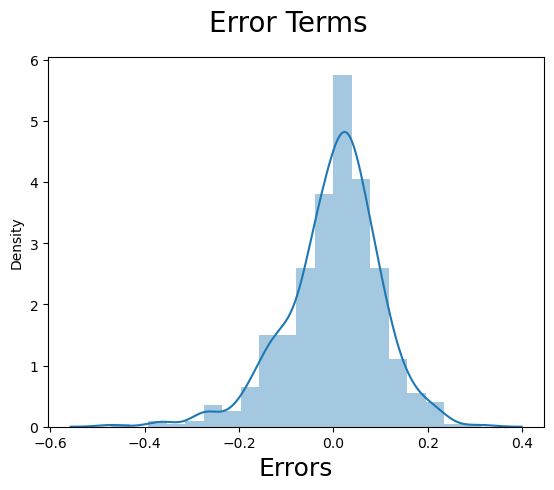

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

- Error terms follows normal distribution

### Making Predictions
#### Applying the scaling on the test sets

In [51]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

##### Dividing into X_test and y_test

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [54]:
# Making predictions
y_pred = lr_2.predict(X_test_new)
y_pred

184    0.434892
535    0.842144
299    0.431868
221    0.568188
152    0.504703
         ...   
400    0.391521
702    0.678464
127    0.459609
640    0.829335
72     0.207153
Length: 219, dtype: float64

### Model Evaluation

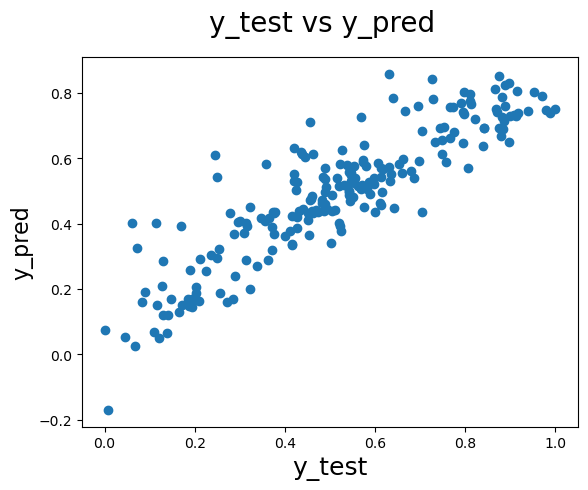

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)       
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

- We can see that the equation of our best fitted line is: 
- cnt= 0.2350 x yr - 0.0862 x holiday + 0.4758 x temp - 0.1325 x windspeed - 0.0616 x mnth_Jul + 0.0498 x mnth_Sept - 0.1032 x season_spring +  0.0504 x season_winter - 0.2562 x weathersit_lightsnow

### R-squared

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test, y_pred)

0.7758490706014969

- We may infer from the R-Squared and adj R-Squared values of the train and test datasets that the above variables can effectively account for about 80% of the demand for bikes.
- According to the final model, the top three variables that significantly contribute to explaining the demand are: temperature (0.4758), year(0.235) and windspeed(-0.1325)